
__Data Description__: Data from 2919 properties observed in Ames, Iowa, compiled by Professor Dean De Cock of Truman University, has 79 variables that can profile almost every aspect of this house. Of these, 1460 data are training data containing 79 variables and corresponding house prices, and 1459 data are test data with only these 79 variables and no house price data. This Kaggle challenge requires the submission of predictions for the test data.

The steps taken are as follows:


## Statistics 
* Shape 
* Descriptive Statistics 
* Distribution skew 

## Data Interaction 
* Correlation  
* Scatterplot 


## Data Preparation
* Classification label encoding 
* Missing value handling 
* Skew feature conversion 


## Basic Models 
* Linear Regression (Linear algo)
* Ridge Regression (Linear algo)
* LASSO Linear Regression (Linear algo)
* Elastic Net Regression (Linear algo)



## Integration Models 
* Bagging 
* Random Forest
* Adaboost
* GBDT(Gradient Boosting Decision Tree)
* Xgboost



In [1]:
# import packages
import warnings
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr
%matplotlib inline


In [2]:
# import original data
train_df = pd.read_csv('train.csv', index_col=0)
test_df = pd.read_csv('test.csv', index_col=0)

In [3]:
#infomation of the dataset features
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## 1) Statistics
* Shape

In [100]:
print(train_df.shape ,test_df.shape)

(1460, 80) (1459, 79)


The shape of the data matches the description of the training data test data.

* Descriptive Statistics

In [101]:
train_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


* Skewness

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

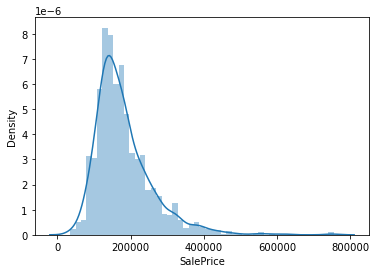

In [102]:
# Distribution of SalePrice
sns.distplot(train_df['SalePrice'])

In [103]:
train_df['SalePrice'].skew()

1.8828757597682129

The skew index for house prices is 1.88, which is consistent with the distribution plot and reflects a rightward skew in the distribution of house prices.

Therefore, we plan to use logarithmic operations.


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

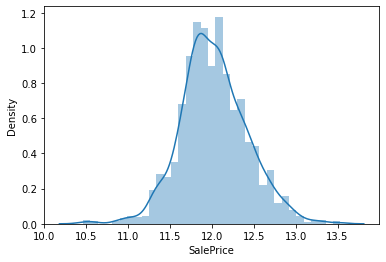

In [104]:
sns.distplot(np.log(train_df['SalePrice']))

In [105]:
# Check the skewness of all numerical features
train_df.select_dtypes(include = ['float64', 'int64']).skew()

MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
SalePrice         1.882876
d

## 2) Data Interaction
* Correlation

<AxesSubplot:>

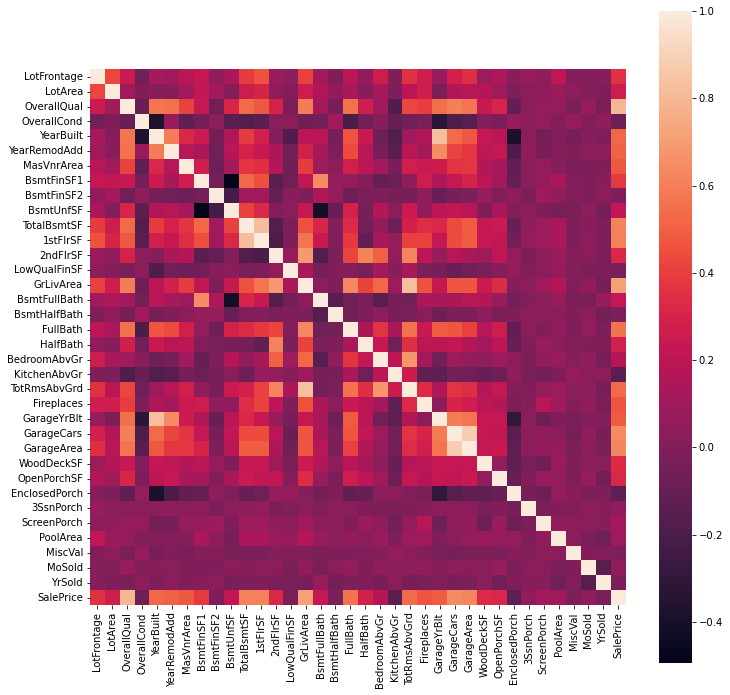

In [106]:
# First, check the correlation between each numerical feature
corr = train_df.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True)

In [107]:
# Correlation of numerical features with SalePrice
cor_dict = corr['SalePrice'].to_dict()
del cor_dict['SalePrice']
print("List the numerical features decendingly by their correlation with Sale Price:\n")
for ele in sorted(cor_dict.items(), key = lambda x: -abs(x[1])):
    print("{0}: \t{1}".format(*ele))

List the numerical features decendingly by their correlation with Sale Price:

OverallQual: 	0.7909816005838053
GrLivArea: 	0.7086244776126515
GarageCars: 	0.6404091972583519
GarageArea: 	0.6234314389183622
TotalBsmtSF: 	0.6135805515591943
1stFlrSF: 	0.6058521846919153
FullBath: 	0.5606637627484453
TotRmsAbvGrd: 	0.5337231555820284
YearBuilt: 	0.5228973328794967
YearRemodAdd: 	0.5071009671113866
GarageYrBlt: 	0.4863616774878596
MasVnrArea: 	0.47749304709571444
Fireplaces: 	0.46692883675152763
BsmtFinSF1: 	0.3864198062421535
LotFrontage: 	0.35179909657067737
WoodDeckSF: 	0.32441344456812926
2ndFlrSF: 	0.31933380283206736
OpenPorchSF: 	0.31585622711605504
HalfBath: 	0.28410767559478256
LotArea: 	0.2638433538714051
BsmtFullBath: 	0.22712223313149427
BsmtUnfSF: 	0.21447910554696928
BedroomAbvGr: 	0.16821315430073963
KitchenAbvGr: 	-0.13590737084214105
EnclosedPorch: 	-0.1285779579259566
ScreenPorch: 	0.11144657114291112
PoolArea: 	0.09240354949187318
OverallCond: 	-0.07785589404867797
MoSo

There is a relatively strong correlation coefficient between SalePrice and these features：

OverallQual, GrLivArea(GarageCars), GargeArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, YearBuilt, YearRemodAdd, GargeYrBlt, MasVnrArea , Fireplaces

But they have a strong correlation between two by two.

* Scatterplot

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

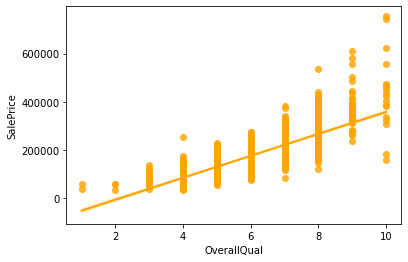

In [108]:
# we can see the OverallQual is positively related to SalePrice
sns.regplot(x = 'OverallQual', y = 'SalePrice', data = train_df, color = 'Orange')

<Figure size 432x288 with 0 Axes>

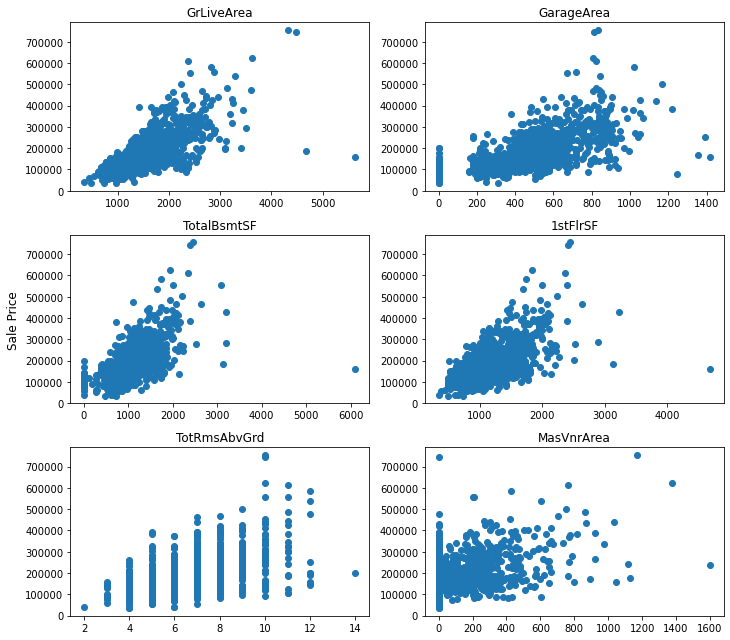

In [109]:
plt.figure(1)
f, axarr = plt.subplots(3, 2, figsize=(10, 9))
price = train_df.SalePrice.values
axarr[0, 0].scatter(train_df.GrLivArea.values, price)
axarr[0, 0].set_title('GrLiveArea')
axarr[0, 1].scatter(train_df.GarageArea.values, price)
axarr[0, 1].set_title('GarageArea')
axarr[1, 0].scatter(train_df.TotalBsmtSF.values, price)
axarr[1, 0].set_title('TotalBsmtSF')
axarr[1, 1].scatter(train_df['1stFlrSF'].values, price)
axarr[1, 1].set_title('1stFlrSF')
axarr[2, 0].scatter(train_df.TotRmsAbvGrd.values, price)
axarr[2, 0].set_title('TotRmsAbvGrd')
axarr[2, 1].scatter(train_df.MasVnrArea.values, price)
axarr[2, 1].set_title('MasVnrArea')
f.text(-0.01, 0.5, 'Sale Price', va='center', rotation='vertical', fontsize = 12)
plt.tight_layout()
plt.show()

## 3) Data Preparation

* Classification label encoding



In [110]:
# Extract SalePrice and take logarithm as train_y
# merge training data and test data for feature processing
y_train = np.log(train_df.pop('SalePrice'))
all_df = pd.concat((train_df, test_df), axis=0)

In [111]:
# pd.get_dummies() turns the categorical variables into 0 and 1 to facilitate later regression operations
all_dummy_df = pd.get_dummies(all_df)
all_dummy_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [112]:
all_dummy_df.shape

(2919, 288)

* Missing value handling


In [113]:
all_dummy_df.isnull().sum().sort_values(ascending=False).head(10)

LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
BsmtHalfBath      2
BsmtFullBath      2
BsmtFinSF1        1
TotalBsmtSF       1
BsmtUnfSF         1
BsmtFinSF2        1
GarageCars        1
dtype: int64

Replace missing values with mean values.

In [114]:
mean_cols = all_dummy_df.mean()
mean_cols.head(10)

MSSubClass         57.137718
LotFrontage        69.305795
LotArea         10168.114080
OverallQual         6.089072
OverallCond         5.564577
YearBuilt        1971.312778
YearRemodAdd     1984.264474
MasVnrArea        102.201312
BsmtFinSF1        441.423235
BsmtFinSF2         49.582248
dtype: float64

In [115]:
all_dummy_df = all_dummy_df.fillna(mean_cols)

* Skew feature conversion

In [116]:
# Log(n+1) for all feature have skew greater than 0.75
numeric_feats = all_df.dtypes[all_df.dtypes != "object"].index
skewed_feats = all_df[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index
all_dummy_df[skewed_feats] = np.log1p(all_dummy_df[skewed_feats])

In [117]:
# Split into training data and test data agian
dummy_train_df = all_dummy_df.loc[train_df.index]
dummy_test_df = all_dummy_df.loc[test_df.index]
dummy_train_df.shape, dummy_test_df.shape

((1460, 288), (1459, 288))

## 4) Basic Models

In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
X_train = dummy_train_df.values
X_test = dummy_test_df.values

* Linear Regression

Sklearn calculates the negative mean square error of the model, so we need to take the negative first and then open the root sign to get the root mean square error of our parameters.

cv = 10 will divide the data into 10 parts of similar size, and use 9 parts in turn for training and 1 part for evaluation to calculate the score, resulting in 10 scores

In [119]:
clf = LinearRegression()
# Do 10-Fold cross validation
test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
print(test_score)

[0.1246848  0.10855647 0.11923838 0.16309823 0.14571851 0.45870003
 0.12627007 0.09833939 0.20138973 0.16073959]


In [120]:
np.mean(test_score)

0.1706735205843622

* Ridge Regression

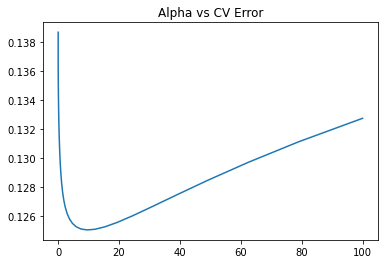

In [121]:
alphas = np.logspace(-3, 2, 50)
test_scores = []
for alpha in alphas:
    clf = Ridge(alpha)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

plt.plot(alphas, test_scores)
plt.title("Alpha vs CV Error");

The Ridge regression model performs best when α is around 10, with a root mean square error of about 0.125.

* Lasso Regression

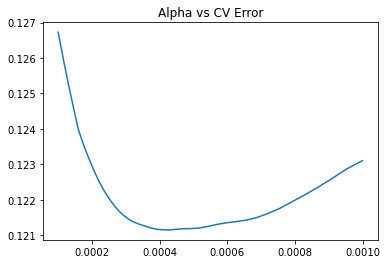

In [122]:
alphas = np.logspace(-4, -3, 50)
test_scores = []
for alpha in alphas:
    clf = Lasso(alpha)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

plt.plot(alphas, test_scores) 
plt.title("Alpha vs CV Error");

The Lasso Regression regression performs best when α is taken around 0.0004, with a root mean square error of about 0.121, which is slightly better than the Ridge regression of 0.125.

* Elastic Net Regression

The Elastic Net Regression combines the advantages of Ridge regression and Lasso regression, i.e., the constraints on the coefficients in the objective function have both L2 and L1 penalty. The previous Ridge and Lasso Regression models show that the best Lasso Regression model is obtained for an L1 parameter of 0.0004, and the best Ridge Regression model is available for an L2 parameter of 10.


In [123]:
# First try to use the best L1, L2 parameters obtained earlier
alpha = 10.0004
l1_ratio = 0.0004/alpha
clf = ElasticNet(alpha = alpha, l1_ratio=l1_ratio)
test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
np.mean(test_score)

0.22412444639114576

In [124]:
# The score is low, so the above method does not work very well. Try to get new parameters by iteration.
from itertools import product
alphas = [0.0005, 0.001, 0.01, 0.03, 0.05, 0.1]
l1_ratios = [1.5, 1.1, 1, 0.9, 0.8, 0.7, 0.5]
cv_elastic = [np.sqrt(-cross_val_score(ElasticNet(alpha = alpha, l1_ratio=l1_ratio),
                                       X_train, y_train, cv=10, scoring='neg_mean_squared_error').mean())
             for (alpha, l1_ratio) in product(alphas, l1_ratios)]


Text(0.5, 0, 'alpha - l1_ratio')

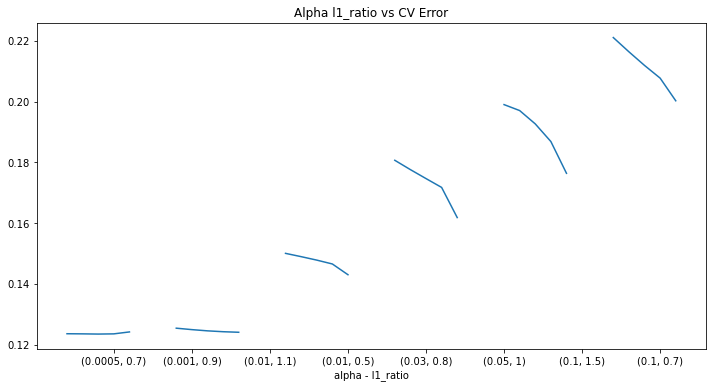

In [125]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

idx = list(product(alphas, l1_ratios))
p_cv_elastic = pd.Series(cv_elastic, index = idx)
p_cv_elastic.plot(title = "Alpha l1_ratio vs CV Error")
plt.xlabel("alpha - l1_ratio")


As we can see above, the first 10 parameter pairs have the lowest error.

Text(0.5, 0, 'alpha - l1_ratio')

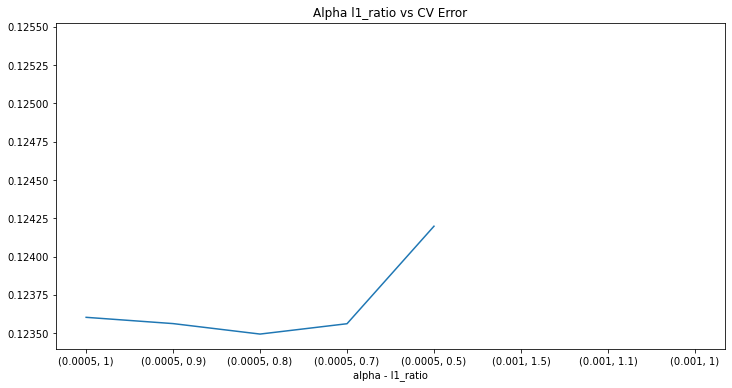

In [126]:
# Zoom in on the first 10 parameter pairs
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
idx = list(product(alphas, l1_ratios))[:10]
p_cv_elastic = pd.Series(cv_elastic[:10], index = idx)
p_cv_elastic.plot(title = "Alpha l1_ratio vs CV Error")
plt.xlabel("alpha - l1_ratio")

The best performance is obtained when α is 0.0005 and L1 accounts for 0.8, and the root mean square error is about 0.123.

In summary, the best performance is obtained when α is 0.0004.


## 5) Integration Models

* Bagging 

For the above best Lasso regression, Elastic Net regression and Ridge regression model with Bagging regression to improve and to see how the model works.


In [127]:
bestclf1 = Lasso(0.0004)
from sklearn.ensemble import BaggingRegressor
bagged = BaggingRegressor(base_estimator=bestclf1, n_estimators=100)
np.sqrt(-cross_val_score(bagged, X_train, y_train, cv=10, scoring='neg_mean_squared_error')).mean()

0.12032956093359633

In [128]:
bestclf2 = ElasticNet(alpha = 0.0005, l1_ratio=0.8)
from sklearn.ensemble import BaggingRegressor
bagged_2 = BaggingRegressor(base_estimator=bestclf2, n_estimators=100)
np.sqrt(-cross_val_score(bagged_2, X_train, y_train, cv=10, scoring='neg_mean_squared_error')).mean()

0.12080188260766929

In [129]:
bestclf3 = Ridge(10)
from sklearn.ensemble import BaggingRegressor
bagged_3 = BaggingRegressor(base_estimator=bestclf3, n_estimators=100)
np.sqrt(-cross_val_score(bagged_3, X_train, y_train, cv=10, scoring='neg_mean_squared_error')).mean()

0.12438701711564523

* Random Forest

In [130]:
from sklearn.ensemble import RandomForestRegressor
np.sqrt(-cross_val_score(RandomForestRegressor(), X_train, y_train, cv=10, scoring='neg_mean_squared_error')).mean()

0.14052804385591894

* Adaboost

In [131]:
from sklearn.ensemble import AdaBoostRegressor
np.sqrt(-cross_val_score(AdaBoostRegressor(base_estimator=bestclf1, n_estimators=100), X_train, y_train, cv=10, scoring='neg_mean_squared_error')).mean()

0.17219237684642477

In [132]:
np.sqrt(-cross_val_score(AdaBoostRegressor(base_estimator=LinearRegression(), n_estimators=100), X_train, y_train, cv=10, scoring='neg_mean_squared_error')).mean()

0.23600503870609976

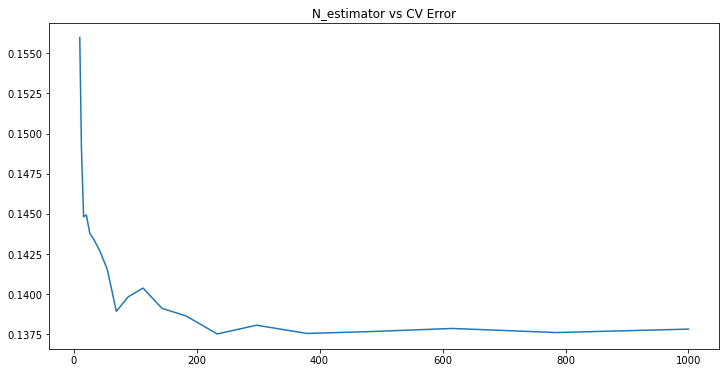

In [133]:
from sklearn.tree import DecisionTreeRegressor 
ns = np.logspace(1, 3, 20)
test_scores = []
for n in ns:
    n = int(n)
    clf = Ridge(alpha)
    test_score = np.sqrt(-cross_val_score(AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=n), X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

plt.plot(ns, test_scores)
plt.title("N_estimator vs CV Error");

In [ ]:
from sklearn.tree import DecisionTreeRegressor 

np.sqrt(-cross_val_score(AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=380), X_train, y_train, cv=10, scoring='neg_mean_squared_error')).mean()

* GBDT

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
np.sqrt(-cross_val_score(GradientBoostingRegressor(**params), X_train, y_train, cv=10, scoring='neg_mean_squared_error')).mean()

* XGboost

In [ ]:
from scipy import x

clf= xgb.XGBRegressor(
                 colsample_bytree=0.2,
                 gamma=0.0,
                 learning_rate=0.01,
                 max_depth=4,
                 min_child_weight=1.5,
                 n_estimators=7200,                                                                  
                 reg_alpha=0.9,
                 reg_lambda=0.6,
                 subsample=0.2,
                 seed=42,
                 silent=1)
np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error')).mean()

# 6) Prediction

In [ ]:
bagged.fit(X_train,y_train)
bagged_2.fit(X_train,y_train)
clf.fit(X_train,y_train)
preds = (7.0*np.exp(clf.predict(X_test))+1.5*np.exp(bagged.predict(X_test)) + 1.5*np.exp(bagged_2.predict(X_test)))/10

In [ ]:
pred_df = pd.DataFrame(preds, index=test_df.index, columns=["SalePrice"])
pred_df.to_csv('output.csv', header=True, index_label='Id')